In [12]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline

import os

import requests
from pandas.tools.plotting import scatter_matrix

from sklearn import model_selection as cv
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [13]:
Data_root = 'Data'
Data_name = 'bot_net.csv'

Path_to_Data = os.path.join(Data_root, Data_name)


In [14]:
df = pd.DataFrame.from_csv(Path_to_Data)
df.columns = ['Date','Local_IP', 'ASN', 'Flows']
df.head(10)

,Date,Local_IP,ASN,Flows
Id,,,,
1,7/1/06,0,701,1
2,7/1/06,0,714,1
3,7/1/06,0,1239,1
4,7/1/06,0,1680,1
5,7/1/06,0,2514,1
6,7/1/06,0,3320,1
7,7/1/06,0,3561,13
8,7/1/06,0,4134,3
9,7/1/06,0,5617,2


In [15]:
df.describe()

,Local_IP,ASN,Flows
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


In [16]:
df.isnull().any()

Date        False
Local_IP    False
ASN         False
Flows       False
dtype: bool

In [42]:
list_dates = df.Date.unique()
print(list_dates)

['7/1/06' '7/2/06' '7/3/06' '7/4/06' '7/5/06' '7/6/06' '7/7/06' '7/8/06'
 '7/9/06' '7/10/06' '7/11/06' '7/12/06' '7/13/06' '7/14/06' '7/15/06'
 '7/16/06' '7/17/06' '7/18/06' '7/19/06' '7/20/06' '7/21/06' '7/22/06'
 '7/23/06' '7/24/06' '7/25/06' '7/26/06' '7/27/06' '7/28/06' '7/29/06'
 '7/30/06' '7/31/06' '8/1/06' '8/2/06' '8/3/06' '8/4/06' '8/5/06' '8/6/06'
 '8/7/06' '8/8/06' '8/9/06' '8/10/06' '8/11/06' '8/12/06' '8/13/06'
 '8/14/06' '8/15/06' '8/16/06' '8/17/06' '8/18/06' '8/19/06' '8/20/06'
 '8/21/06' '8/22/06' '8/23/06' '8/24/06' '8/25/06' '8/26/06' '8/27/06'
 '8/28/06' '8/29/06' '8/30/06' '8/31/06' '9/1/06' '9/2/06' '9/3/06'
 '9/4/06' '9/5/06' '9/6/06' '9/7/06' '9/8/06' '9/9/06' '9/10/06' '9/11/06'
 '9/12/06' '9/13/06' '9/14/06' '9/15/06' '9/16/06' '9/17/06' '9/18/06'
 '9/19/06' '9/20/06' '9/21/06' '9/22/06' '9/23/06' '9/24/06' '9/25/06'
 '9/26/06' '9/27/06' '9/28/06' '9/29/06' '9/30/06']


In [48]:
mean_flows= df.groupby(['Date','Local_IP'], as_index=False)['Flows'].mean()
median_flows= df.groupby(['Date', 'Local_IP'], as_index=False)['Flows'].median()
mean_flows.head(100)

,Date,Local_IP,Flows
0,7/1/06,0,3.028571
1,7/1/06,1,33.684211
2,7/1/06,2,111.800000
3,7/1/06,3,2.444444
4,7/1/06,4,16.727273
5,7/1/06,5,3.666667
6,7/1/06,6,5.727273
7,7/1/06,7,12.843750
8,7/1/06,8,11.487179
9,7/1/06,9,39.540541


In [50]:
median_flows.head()

,Date,Local_IP,Flows
0,7/1/06,0,1.0
1,7/1/06,1,3.0
2,7/1/06,2,8.0
3,7/1/06,3,1.0
4,7/1/06,4,6.0


In [54]:
df_mean_med_flows = pd.concat([mean_flows, median_flows], axis=1)
df_mean_med_flows.head(100)

,Date,Local_IP,Flows,Date,Local_IP,Flows
0,7/1/06,0,3.028571,7/1/06,0,1.0
1,7/1/06,1,33.684211,7/1/06,1,3.0
2,7/1/06,2,111.800000,7/1/06,2,8.0
3,7/1/06,3,2.444444,7/1/06,3,1.0
4,7/1/06,4,16.727273,7/1/06,4,6.0
5,7/1/06,5,3.666667,7/1/06,5,3.0
6,7/1/06,6,5.727273,7/1/06,6,4.0
7,7/1/06,7,12.843750,7/1/06,7,6.5
8,7/1/06,8,11.487179,7/1/06,8,4.0
9,7/1/06,9,39.540541,7/1/06,9,8.0


In [55]:
df_mean_med_flows.columns = ['Date','Local_IP', 'Flows_Mean', 'Date1','IP1', 'Flows_Median']


In [57]:
df_mean_med_flows.drop(['Date1', 'IP1'], axis=1)

,Date,Local_IP,Flows_Mean,Flows_Median
0,7/1/06,0,3.028571,1.0
1,7/1/06,1,33.684211,3.0
2,7/1/06,2,111.800000,8.0
3,7/1/06,3,2.444444,1.0
4,7/1/06,4,16.727273,6.0
5,7/1/06,5,3.666667,3.0
6,7/1/06,6,5.727273,4.0
7,7/1/06,7,12.843750,6.5
8,7/1/06,8,11.487179,4.0
9,7/1/06,9,39.540541,8.0


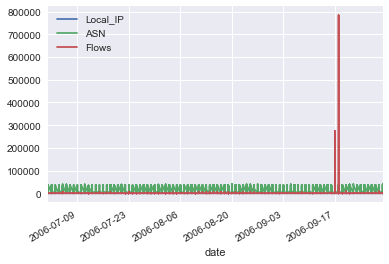

In [6]:
df.plot()

In [7]:

def histogram_creator(variable_name):
    try:
        sns.countplot(data=df, x=variable_name)
        plt.title(
            f"Frequency of {variable_name} "
            f"({'unique' if df[variable_name].is_unique else 'not unique'})",
            fontsize = 15
        )
        plt.ylabel("Count", fontsize = 12)
        plt.xlabel(variable_name, fontsize = 12)
        plt.show()
    except:
        print(f"Error Plotting \"{variable_name}\"")
    

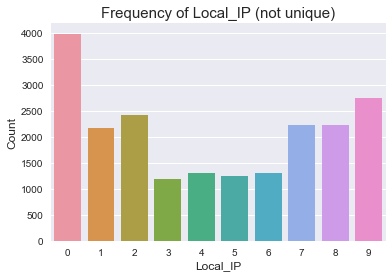

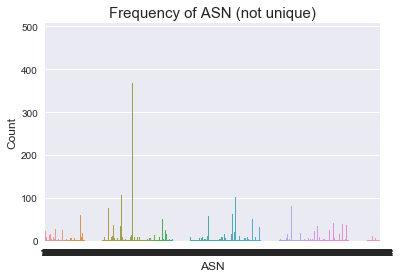

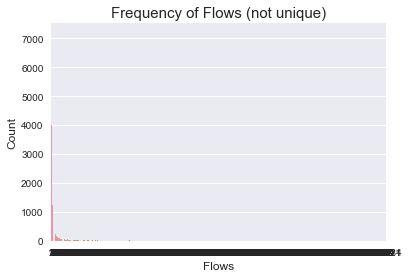

In [8]:
list_columns = list(df.columns.values)
for column in list_columns:
    histogram_creator(column)

In [9]:
df.dtypes


Local_IP    int64
ASN         int64
Flows       int64
dtype: object

In [10]:
ip = list(df['Local_IP']) 
asn = list(df['ASN'])

In [54]:
x=ip
y=asn

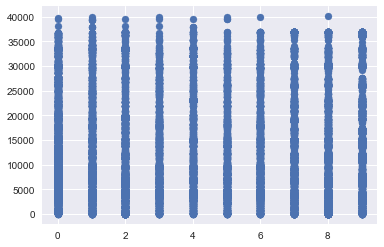

In [55]:
plt.scatter(x,y)

In [56]:
X = df.drop('Local_IP', axis=1)
Y = df['Local_IP']

In [73]:
from sklearn.model_selection import train_test_split as tts 

X_train, X_test, y_train, y_test = tts(X,y, test_size=1)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [75]:
model = GaussianNB()

In [76]:
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [77]:
model.score(X_test, y_test)

1.0

In [78]:
from sklearn.metrics import classification_report

In [79]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      10755       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         1



/Users/alexisvstarr/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


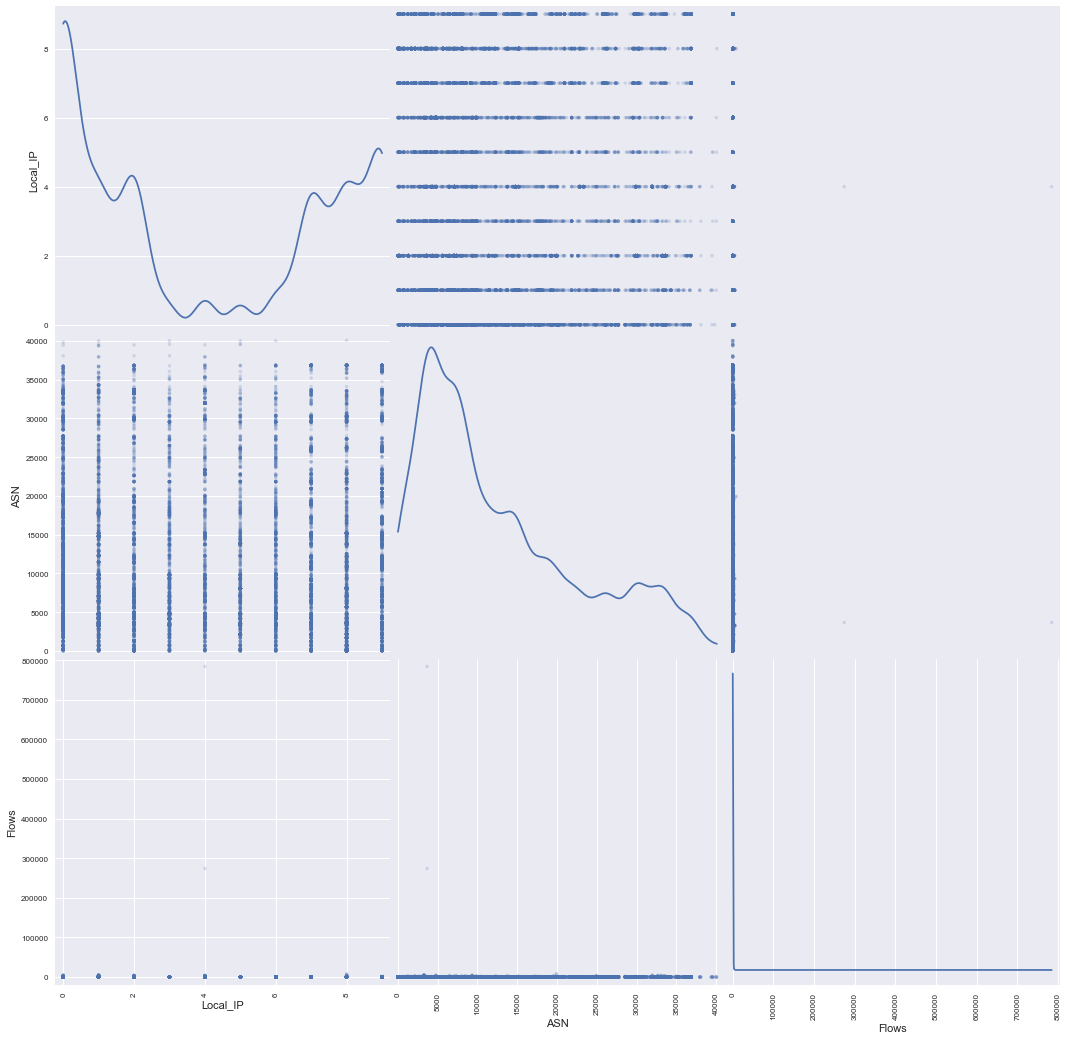

In [80]:
scatter_matrix(df, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()